# Curse of Dimensionality

```{contents}
```

For more details, see the curse of dimensionality section in {doc}`concept`.

The curse of dimensionality refers to the phenomenon where the space becomes so
high-dimensional that the data becomes sparse, and traditional distance metrics
lose their effectiveness.

Consider a dataset with $N$ observations, each having $D$ features, forming a
$D$-dimensional space $\mathbb{R}^D$. As $D$ grows, the volume of the space
grows exponentially, and the data becomes more spread out.

## Problem with Euclidean Distance

In high-dimensional spaces, the Euclidean distance between observations tends to
converge to a constant value. To see why, consider two random points
$x, y \in \mathbb{R}^D$, sampled uniformly within a unit hypercube
$\mathcal{C} = [0,1]^D$. The expected squared distance between these points is
given by:

$$
\mathbb{E}\left[ \| x - y \|^2 \right] = \sum_{i=1}^{D} \mathbb{E}\left[ (x_i - y_i)^2 \right] = D \cdot \mathbb{E}\left[ (x_1 - y_1)^2 \right] = \frac{D}{3}
$$

Here, $x_i$ and $y_i$ are the $i$-th components of $x$ and $y$, respectively.

As $D$ grows, the mean distance grows linearly, but the standard deviation grows
much more slowly. The ratio of the standard deviation to the mean distance tends
to zero:

$$
\frac{\text{Standard Deviation}}{\text{Mean Distance}} \to 0 \quad \text{as} \quad D \to \infty
$$

### 1. Derivation of Mean Distance

The expected squared distance between two points in a $D$-dimensional space:

$$
\mathbb{E}\left[ \| x - y \|^2 \right] = \frac{D}{3}
$$

To prove this, we see that the expression $\frac{D}{3}$ represents the expected
squared Euclidean distance between two random points $x$ and $y$ in
$\mathbb{R}^D$, where both points are sampled uniformly within a unit hypercube
$\mathcal{C} = [0,1]^D$. Let's break down how this value is derived.

1. **Single Dimension Expectation**: We start by looking at a single dimension
   and compute the expected squared difference between two random variables
   $x_i$ and $y_i$, which are uniformly distributed in the interval [0,1]. The
   expectation is given by:

    $$
    \mathbb{E}\left[ (x_i - y_i)^2 \right] = \int_0^1 \int_0^1 (x_i - y_i)^2 dx_i dy_i
    $$

    This integral can be computed by expanding the square and integrating term
    by term:

    $$
    \begin{align*}
    \mathbb{E}\left[ (x_i - y_i)^2 \right] &= \int_0^1 \int_0^1 (x_i^2 - 2x_i y_i + y_i^2) dx_i dy_i \\
    &= \int_0^1 \int_0^1 x_i^2 dx_i dy_i - \int_0^1 \int_0^1 2x_i y_i dx_i dy_i + \int_0^1 \int_0^1 y_i^2 dx_i dy_i \\
    &= \int_0^1 \left[ \frac{x_i^3}{3} \right]_0^1 dy_i - \int_0^1 \left[ x_i^2 y_i \right]_0^1 dy_i + \int_0^1 \left[ \frac{y_i^3}{3} \right]_0^1 dx_i \\
    &= \int_0^1 \frac{1}{3} dy_i - \int_0^1 \frac{1}{3} y_i dy_i + \int_0^1 \frac{1}{3} dx_i \\
    &= \frac{1}{3} - \frac{1}{6} + \frac{1}{3} = \frac{1}{3}
    \end{align*}
    $$

2. **Summing Over All Dimensions**: Since the components are independent and
   identically distributed, we can multiply this expectation by $D$ to find the
   expected squared distance in $\mathbb{R}^D$:

    $$
    \mathbb{E}\left[ \| x - y \|^2 \right] = D \cdot \mathbb{E}\left[ (x_1 - y_1)^2 \right] = \frac{D}{3}
    $$

So the value $\frac{D}{3}$ arises from computing the expected squared difference
in a single dimension and then scaling it by the number of dimensions $D$. It
encapsulates how the mean squared distance between two random points in a unit
hypercube grows linearly with the dimensionality.

The expectation of the squared difference between $x_i$ and $y_i$ (when both are
uniformly distributed in the interval [0,1]) can be computed as:

$$
\mathbb{E}\left[ (x_i - y_i)^2 \right] = \int_0^1 \int_0^1 (x_i - y_i)^2 dx_i dy_i = \frac{1}{3}
$$

### 2. Derivation of Standard Deviation

Now, let's calculate the variance of the squared distance between $x$ and $y$:

$$
\text{Var}\left[ \| x - y \|^2 \right] = \mathbb{E}\left[ \left( \| x - y \|^2 \right)^2 \right] - \left( \mathbb{E}\left[ \| x - y \|^2 \right] \right)^2
$$

We already know that $\mathbb{E}\left[ \| x - y \|^2 \right] = \frac{D}{3}$, so
we need to calculate $\mathbb{E}\left[ \left( \| x - y \|^2 \right)^2 \right]$:

$$
\begin{align*}
\mathbb{E}\left[ \left( \| x - y \|^2 \right)^2 \right] &= \mathbb{E}\left[ \left( \sum_{i=1}^{D} (x_i - y_i)^2 \right)^2 \right] \\
&= \mathbb{E}\left[ \sum_{i=1}^{D} (x_i - y_i)^4 + 2\sum_{i=1}^{D}\sum_{j \neq i} (x_i - y_i)^2(x_j - y_j)^2 \right] \\
&= D \cdot \mathbb{E}\left[ (x_1 - y_1)^4 \right] + D(D-1) \cdot \left( \mathbb{E}\left[ (x_1 - y_1)^2 \right] \right)^2 \\
&= \frac{D}{5} + \frac{D(D-1)}{9}
\end{align*}
$$

Substituting these values back into the expression for variance, we can find the
standard deviation:

$$
\text{Standard Deviation} = \sqrt{\text{Var}\left[ \| x - y \|^2 \right]} = \sqrt{\frac{D}{5} + \frac{D(D-1)}{9} - \frac{D^2}{9}} = \sqrt{\frac{4D}{45} - \frac{D^2}{45}}
$$

### 3. Ratio of Standard Deviation to Mean Distance

Now, we have:

$$
\frac{\text{Standard Deviation}}{\text{Mean Distance}} = \frac{\sqrt{\frac{4D}{45} - \frac{D^2}{45}}}{\frac{D}{3}} = \sqrt{\frac{4 - D}{15D}}
$$

As $D \to \infty$, the ratio $\sqrt{\frac{4 - D}{15D}}$ tends to zero.

## Implications

1. **Equidistant Observations**: All observations appear almost equidistant from
   each other, making the notion of "closeness" or "similarity" less meaningful.
2. **Difficulty in Clustering**: Traditional clustering algorithms that rely on
   distance measures struggle to form meaningful clusters, as the distances
   between arbitrary points become more difficult to distinguish.
3. **Sparse Data Representation**: The high-dimensional space is mostly empty,
   and the data only occupies a tiny fraction of the available space.

## Conclusion

The curse of dimensionality highlights the importance of careful feature
selection and dimensionality reduction when working with high-dimensional data.
It emphasizes the challenges in using distance-based algorithms, such as K-NN,
in spaces where the concept of distance becomes less discriminative. Techniques
like Principal Component Analysis (PCA) or t-Distributed Stochastic Neighbor
Embedding (t-SNE) can be used to reduce the dimensionality and mitigate the
effects of the curse.

## Python Illustration

Here's how the code illustrates aspects of the curse of dimensionality:

### 1. Growth of Mean Distance

As the dimensionality increases, the mean distance between points and the origin
grows linearly. You will see that the mean distance increases as you go from
lower to higher dimensions. This is consistent with the expression
$\mathbb{E}\left[ \| x - y \|^2 \right] = \frac{D}{3}$, where $D$ is the
dimensionality.

### 2. Convergence of Distances

In high-dimensional spaces, distances between points start to converge. You can
observe this in the histograms and KDE plots: as the dimensionality increases,
the spread of the distances will shrink. This is reflected in the reduction of
the standard deviation relative to the mean.

### 3. Loss of Contrast in Distance Metric

In very high dimensions (e.g., $D=1000$), the distances between points may
become so alike that the distance metric loses its ability to discern
differences between points. All points seem almost equidistant from each other.
You might observe that the KDE curves become sharper, and the histograms might
appear more concentrated around the mean.

### Illustration 1. Subplots

1 dimensions:
#   Generated 200 points
#   Test point:  [0.]
#   Average distance (STD) of test point to 200 samples: 0.537451 (0.272034)
2 dimensions:
#   Generated 200 points
#   Test point:  [0. 0.]
#   Average distance (STD) of test point to 200 samples: 0.735898 (0.299094)
3 dimensions:
#   Generated 200 points
#   Test point:  [0. 0. 0.]
#   Average distance (STD) of test point to 200 samples: 1.005613 (0.257270)
4 dimensions:
#   Generated 200 points
#   Test point:  [0. 0. 0. 0.]
#   Average distance (STD) of test point to 200 samples: 1.112198 (0.269631)
8 dimensions:
#   Generated 200 points
#   Test point:  [0. 0. 0. 0. 0. 0. 0. 0.]
#   Average distance (STD) of test point to 200 samples: 1.595828 (0.269546)
10 dimensions:
#   Generated 200 points
#   Test point:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
#   Average distance (STD) of test point to 200 samples: 1.781639 (0.274815)
100 dimensions:
#   Generated 200 points
#   Test point:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

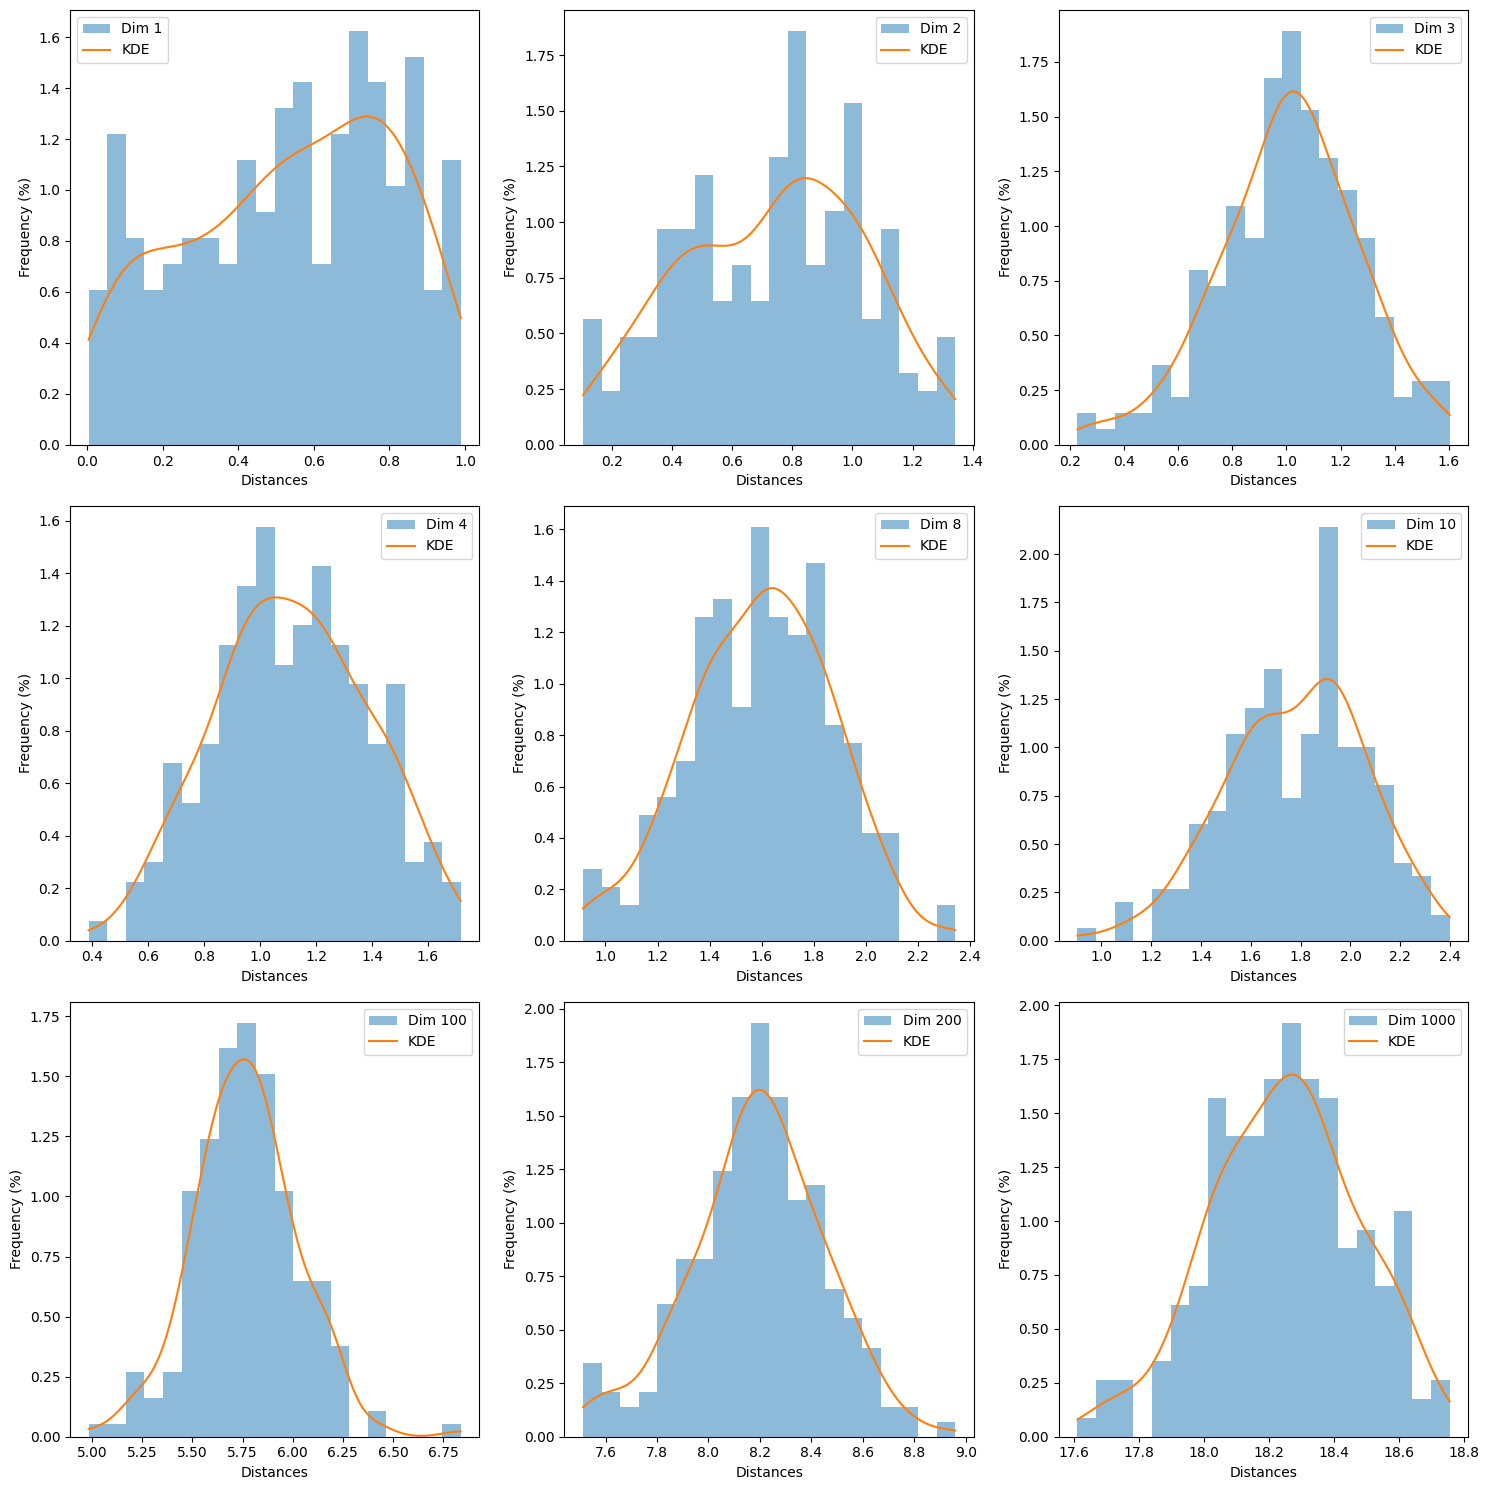

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List
from scipy.stats import gaussian_kde

def compute_distances(dimensions: List[int], samples: int = 200) -> None:
    """
    Computes the average Euclidean distance from the origin to a number of
    randomly generated points in different dimensions, and plots the
    distribution of these distances.

    Parameters
    ----------
    dimensions : List[int]
        List of dimensions to consider.
    samples : int, optional
        Number of random points to generate in each dimension. Default is 200.
    """
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))
    axes = axes.flatten()

    for idx, dim in enumerate(dimensions):
        X = np.random.uniform(size=(samples, dim))
        x = np.zeros(dim)  # at origin
        print("%d dimensions:" % dim)
        print("#   Generated %d points" % samples)
        print("#   Test point: ", x)
        dist_array = [np.linalg.norm(x - X[j]) for j in range(len(X))]

        distances = np.array(dist_array)
        print("#   Average distance (STD) of test point to %d samples: %f (%f)"
              % (samples, distances.mean(), distances.std()))

        # Plot histogram
        axes[idx].hist(distances, bins=int(samples/10), density=True,
                       label='Dim %d' % dim, alpha=0.5)

        # Plot KDE
        kde = gaussian_kde(distances)
        x_vals = np.linspace(min(distances), max(distances), 1000)
        y_vals = kde(x_vals)
        axes[idx].plot(x_vals, y_vals, label='KDE')

        # Label axes
        axes[idx].set(xlabel='Distances', ylabel='Frequency (%)')
        axes[idx].legend()

    plt.tight_layout()
    plt.show()

dimensions = [1, 2, 3, 4, 8, 10, 100, 200, 1000]
compute_distances(dimensions)


When $D=1000$, the mean concentrates around $18$, which is correct with our formula:

$$
\begin{aligned}
\mathbb{E}\left[ \| x - y \|^2 \right] &= \frac{D}{3} = \frac{1000}{3} \approx 333.33
\end{aligned}
$$

but recall this is the expected value of the squared distance, but
to calculate the expected *euclidean* distance, we need to take the square root:

$$
\begin{aligned}
\mathbb{E}\left[ \| x - y \| \right] &= \sqrt{\mathbb{E}\left[ \| x - y \|^2 \right]} \\
&= \sqrt{\frac{D}{3}} \\
&= \sqrt{\frac{1000}{3}} \approx 18.26
\end{aligned}
$$

### Illustration 2. In one plot

1 dimensions:
#   Generated 200 points
#   Test point:  [0.]
#   Average distance (STD) of test point to 200 samples: 0.519458 (0.288953)
2 dimensions:
#   Generated 200 points
#   Test point:  [0. 0.]
#   Average distance (STD) of test point to 200 samples: 0.748706 (0.288355)
3 dimensions:
#   Generated 200 points
#   Test point:  [0. 0. 0.]
#   Average distance (STD) of test point to 200 samples: 0.965478 (0.257479)
4 dimensions:
#   Generated 200 points
#   Test point:  [0. 0. 0. 0.]
#   Average distance (STD) of test point to 200 samples: 1.138012 (0.253795)
8 dimensions:
#   Generated 200 points
#   Test point:  [0. 0. 0. 0. 0. 0. 0. 0.]
#   Average distance (STD) of test point to 200 samples: 1.592812 (0.270281)
10 dimensions:
#   Generated 200 points
#   Test point:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
#   Average distance (STD) of test point to 200 samples: 1.810247 (0.259906)
100 dimensions:
#   Generated 200 points
#   Test point:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

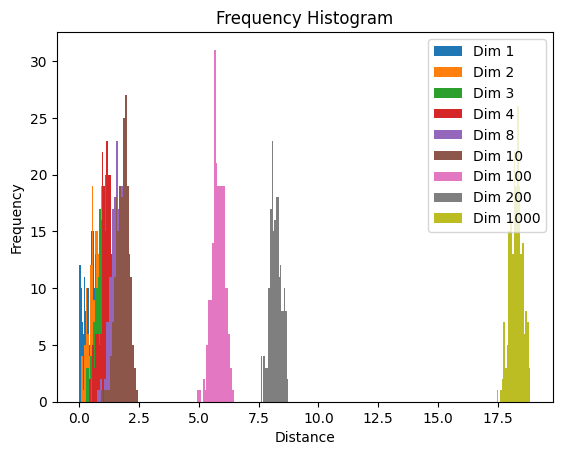

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List

def compute_distances(dimensions: List[int], samples: int = 200) -> None:
    """
    Computes the average Euclidean distance from the origin to a number of
    randomly generated points in different dimensions, and plots the
    distribution of these distances.

    Parameters
    ----------
    dimensions : List[int]
        List of dimensions to consider.
    samples : int, optional
        Number of random points to generate in each dimension. Default is 200.
    """
    for dim in dimensions:
        X = np.random.uniform(size=(samples, dim))
        x = np.zeros(dim)  # at origin
        print("%d dimensions:" % dim)
        print("#   Generated %d points" % samples)
        print("#   Test point: ", x)
        dist_array = [np.linalg.norm(x - X[j]) for j in range(len(X))]

        distances = np.array(dist_array)
        print("#   Average distance (STD) of test point to %d samples: %f (%f)"
              % (samples, distances.mean(), distances.std()))

        plt.hist(distances, bins=int(samples/10), label='Dim %d' % dim)

    plt.gca().set(title='Frequency Histogram', xlabel='Distance', ylabel='Frequency')
    plt.legend()
    plt.show()

dimensions = [1, 2, 3, 4, 8, 10, 100, 200, 1000]
compute_distances(dimensions)


1. **Generating Random Points**: For each specified dimension in the
   `dimensions` list, the code generates `samples` random points uniformly
   distributed within a unit hypercube of that dimension. This is done by the
   line `X = np.random.uniform(size=(samples, dim))`.

2. **Defining a Test Point**: The test point `x` is defined as the origin in the
   given dimension, i.e., a point with all coordinates equal to zero.

3. **Computing Distances**: For each randomly generated point in `X`, the code
   computes the Euclidean distance to the test point `x`. This results in an
   array of distances, `distances`.

4. **Plotting Histograms**: The code then plots a histogram of these distances,
   with the distances on the x-axis and the frequency on the y-axis. This is
   done for each specified dimension, and the histograms are shown in a single
   plot.

### What the Code Demonstrates

#### Distances in Low Dimensions

**Distances in Low Dimensions**: In low-dimensional spaces (e.g., 1, 2, or 3
dimensions), you will observe that the distances are spread across a range, with
many points relatively close to the origin.

#### Distances in High Dimensions

**Distances in High Dimensions**: As the number of dimensions increases, the
distances between the origin and the randomly generated points tend to increase
and concentrate within a narrow range. This means that in high-dimensional
spaces, all points tend to be far away from the origin,
even though they are sampled uniformly from a unit hypercube.

In high-dimensional spaces, the absolute distances between points (and from the
origin) tend to be larger, but the relative differences in those distances
become smaller. Points are not necessarily closer to each other in an absolute
sense, but the distribution of distances becomes more concentrated, leading to a
loss of contrast in the distance metric.

Sampling from a unit hypercube ensures that the points cannot be far from the
origin because all the coordinates of the points are restricted to the interval
$[0, 1]$ for each dimension.

Since all coordinates are bounded within the range $[0, 1]$, any point inside
the unit hypercube will have a Euclidean distance to the origin that is bounded
by

$$\sqrt{D}$$

Here's the reasoning:

-   The minimum distance is when all coordinates are 0, so the distance is
    $\sqrt{0 + 0 + \ldots + 0} = 0$.
-   The maximum distance is when all coordinates are 1, so the distance is
    $\sqrt{1 + 1 + \ldots + 1} = \sqrt{D}$.

Hence, all the points within a unit hypercube are guaranteed to lie within a
distance of $\sqrt{D}$ from the origin. This constraint ensures that the points
cannot be arbitrarily far from the origin, and the "spread" of the distances is
related to the dimensionality $D$.

#### More Intuition on Distances in High Dimensions

1. **Distance Increase**: As the number of dimensions increases, the maximum
   possible distance from the origin also increases. In a unit hypercube, the
   maximum distance is $\sqrt{D}$, where $D$ is the number of dimensions. Thus,
   as $D$ increases, the maximum distance increases, which means that points
   tend to be farther from the origin.

2. **Concentration of Distance**: Even though the points are uniformly sampled
   from the unit hypercube, the volume of the hypercube grows exponentially with
   the dimensionality. This causes the distances between points (including the
   origin) to concentrate within a narrow range.

    - Imagine randomly sampling points in a 2D square $[0,1] \times [0,1]$. The
      distances will vary widely.
    - Now imagine sampling points in a 1000D unit hypercube. The distances will
      be very close to $\sqrt{1000}$ and will vary much less relative to the
      mean distance.

3. **Relative Distances**: In high-dimensional spaces, the difference between
   the minimum and maximum distances between points becomes relatively small.
   This makes the concept of "closeness" or "similarity" less meaningful. If two
   points are randomly chosen, the ratio of the distances tends to 1, making it
   difficult to distinguish relative distances.

## Implications for Clustering and K-NN


This phenomenon has significant implications for clustering and algorithms like
k-NN that rely on distance metrics:

-   All points tend to be almost equally distant from each other, which
    undermines the foundational assumption of similarity.
-   The required number of samples grows exponentially with the dimension to
    maintain the same level of representativeness.
-   The distance measure becomes less informative, and the algorithm's
    performance may degrade.


The code is refactored, the original author is below:

Authored by Lee Yi Quan, Mohammad Neamul Kabir and [Min-Yen Kan](http://www.comp.nus.edu.sg/~kanmy) (2019), affiliated with [WING](http://wing.comp.nus.edu.sg), [NUS School of Computing](http://www.comp.nus.edu.sg) and [ALSET](http://www.nus.edu.sg/alset).
Licensed as: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0/ ) (CC BY 4.0).  